# U.S. Medical Insurance Costs

Import pandas and numpy to make working with the data easier. 
Import the csv file into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency as chi2, ttest_ind
df = pd.DataFrame(pd.read_csv('C:/Users/scott/Desktop/Programming Stuff/Python Stuff/US Medical Insurance Portfolio Project/python-portfolio-project-starter-files/insurance.csv'))


Let's read the first few lines of the data so we can understand what we're working with.

In [2]:
print(df.head())
df.info()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So we have 1338 different entries/people. 
5 columns of different data types.

## Goals:

##### - What's the average charges for men and women?
##### - What's the average age of people with children?
##### - Which region do most people come from? 
##### - On average how much more do smokers pay for insurance?
##### - Is there a correlation between non-smokers and children?

### First, let's start with averages for men and women and see how different they are.
I want to begin by making two new DataFrames: one with only men and one with only women.

In [3]:
male_df = df[(df.sex == 'male')].reset_index()
female_df = df[(df.sex == 'female')].reset_index()
print(male_df.head())
print(female_df.head())

   index  age   sex     bmi  children smoker     region      charges
0      1   18  male  33.770         1     no  southeast   1725.55230
1      2   28  male  33.000         3     no  southeast   4449.46200
2      3   33  male  22.705         0     no  northwest  21984.47061
3      4   32  male  28.880         0     no  northwest   3866.85520
4      8   37  male  29.830         2     no  northeast   6406.41070
   index  age     sex    bmi  children smoker     region      charges
0      0   19  female  27.90         0    yes  southwest  16884.92400
1      5   31  female  25.74         0     no  southeast   3756.62160
2      6   46  female  33.44         1     no  southeast   8240.58960
3      7   37  female  27.74         3     no  northwest   7281.50560
4      9   60  female  25.84         0     no  northwest  28923.13692


Now we can easily crunch numbers on men and women separately.

In [4]:
female_charges_avg = np.mean(female_df.charges)
male_charges_avg = np.mean(male_df.charges)

print(female_charges_avg, male_charges_avg)

12569.57884383534 13956.751177721886


So we can see that men pay about $1400 more than women on average.
What I really want to know is whether or not this is statistically significant or if this is just random chance based on the people we have.

We're going to run an Independent T-Test to determine this. We're using an Independent T-Test because we are comparing the averages of two different quantitative groups.

In [5]:
ttest_ind(female_df.charges, male_df.charges)

Ttest_indResult(statistic=-2.097546590051688, pvalue=0.03613272100592976)

A p-value of .036 tells us that this disparity in averages prices is **not** due to random chance and that men truly are charged more than women; at least on average. We technically don't know what the equation is to calculate these costs, but we can feel confident that men are truly charged more.

### Now, let's see what the average age is for people who have children and those who don't have children
To do this, we will make a DF including *only* people who have children.

In [6]:
children_df = df[(df.children != 0)]
print(children_df.head())

no_children_df = df[(df.children == 0)]

average_age_parents = np.mean(children_df.age)
average_age_not_parents = np.mean(no_children_df.age)
print(average_age_parents, average_age_not_parents)

   age     sex    bmi  children smoker     region    charges
1   18    male  33.77         1     no  southeast  1725.5523
2   28    male  33.00         3     no  southeast  4449.4620
6   46  female  33.44         1     no  southeast  8240.5896
7   37  female  27.74         3     no  northwest  7281.5056
8   37    male  29.83         2     no  northeast  6406.4107
39.78010471204188 38.444250871080136


The averages are very close. Once again, let's see if there's any significance to this. Are parents, on average, older than those who do not have children?

In [7]:
ttest_ind(children_df.age, no_children_df.age)

Ttest_indResult(statistic=1.7225732067376982, pvalue=0.08519715637989463)

With a p-value of .085 we can conclude that there is most likely *no* significance in the age gap between people with kids and people without kids.

### Let's now find out how many people come from each region. We will put this in a DataFrame that we will be able to easily reference to the different regions.

In [8]:
region_group = df.groupby('region').age.count().reset_index()
region_group.rename(columns = {'age': 'count'}, inplace = True)
print(region_group)

      region  count
0  northeast    324
1  northwest    325
2  southeast    364
3  southwest    325


### How much more, on average, do people who smoke pay for insurance.
First, we'll put smokers and non-smokers into two different DataFrames

In [13]:
df_smokers = df[(df.smoker == 'yes')].reset_index()
df_nonsmoker = df[(df.smoker == 'no')].reset_index()
print(df_smokers.head())
print(df_nonsmoker.head())

   index  age     sex    bmi  children smoker     region     charges
0      0   19  female  27.90         0    yes  southwest  16884.9240
1     11   62  female  26.29         0    yes  southeast  27808.7251
2     14   27    male  42.13         0    yes  southeast  39611.7577
3     19   30    male  35.30         0    yes  southwest  36837.4670
4     23   34  female  31.92         1    yes  northeast  37701.8768
   index  age     sex     bmi  children smoker     region      charges
0      1   18    male  33.770         1     no  southeast   1725.55230
1      2   28    male  33.000         3     no  southeast   4449.46200
2      3   33    male  22.705         0     no  northwest  21984.47061
3      4   32    male  28.880         0     no  northwest   3866.85520
4      5   31  female  25.740         0     no  southeast   3756.62160


Now that we have our two groups, let's crunch the numbers and see how much more smokers pay on average.

In [16]:
smokers_avg = np.mean(df_smokers.charges)
nonsmoker_avg = np.mean(df_nonsmoker.charges)
print(smokers_avg, nonsmoker_avg, (smokers_avg - nonsmoker_avg))

32050.23183153285 8434.268297856199 23615.96353367665


As predicted, smokers pay on average $23616 more than non-smokers.

### Now, let's see if there's a correlation between number of children and smokers
We already have our two groups of smokers and non-smokers, so we can save time there.
Our first task will be to plot the smokers and number of children on a plot to see if we can immediately see a difference.

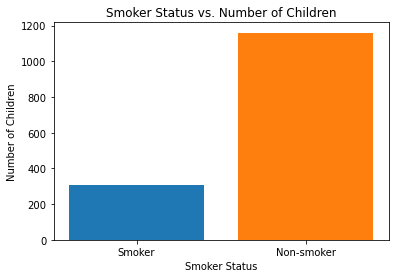

305 1160


In [27]:
from matplotlib import pyplot as plt
sum_of_smoker = np.sum(df_smokers.children)
sum_of_nonsmoker = np.sum(df_nonsmoker.children)
plt.bar('Smoker', sum_of_smoker)
plt.bar('Non-smoker', sum_of_nonsmoker)
plt.ylabel('Number of Children')
plt.xlabel('Smoker Status')
plt.title('Smoker Status vs. Number of Children')
plt.show()
print(sum_of_smoker, sum_of_nonsmoker)

As we can see, there is a massive variance -- of nearly 4x higher -- number of children between smokers and non-smokers. 

### Let's graph smoker status and BMI on a similar graph and see if we can see a difference

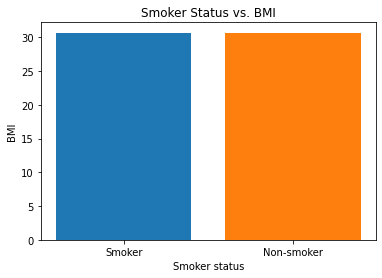

30.708448905109503 30.651795112781922


In [28]:
bmi_avg_smoker = np.mean(df_smokers.bmi)
bmi_avg_nonsmoker = np.mean(df_nonsmoker.bmi)
plt.close()
plt.bar('Smoker', bmi_avg_smoker)
plt.bar('Non-smoker', bmi_avg_nonsmoker)
plt.ylabel('BMI')
plt.xlabel('Smoker status')
plt.title('Smoker Status vs. BMI')
plt.show()
print(bmi_avg_smoker, bmi_avg_nonsmoker)

As we can see, there is very little difference in BMI between smokers and non-smokers. Let's run a test to see if this .05 difference is significant or not. 

In [29]:
ttest_ind(df_smokers.bmi, df_nonsmoker.bmi)

Ttest_indResult(statistic=0.13708403310827058, pvalue=0.8909850280013042)

With a p-value of .891 we can confidently say there is no statistical significance between the difference of the BMI of smokers and non-smokers.